# Questions:
What songs are most popular?
    
    - Top 5 most popular songs for every decade. 


    - Which sub-genres are most popular on average?
        - Characteristics of popular songs

        
    - Regression analysis on song popularity vs characteristics

## Quick Data Cleansing

In [1]:
import pandas as pd

# load dataset

df = pd.read_csv('/Users/rachelburgess/Downloads/archive/spotify_songs.csv')

In [2]:
# display the first few rows of the df 
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [3]:

# get a concise summary of the df

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
# statistical summary of the df

print(df.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

In [5]:
# experimenting to see what happens if you don't standardise to year only vs data patterns that might come from standardizing

# Convert 'track_album_release_date' to datetime, coercing errors to NaT
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract just the year from these dates
df['year_only'] = df['track_album_release_date'].dt.year

# For entries that are NaT in 'track_album_release_date', fill with the first day of the year from 'year_only'
df['track_album_release_date'] = df['track_album_release_date'].fillna(pd.to_datetime(df['year_only'], format='%Y'))

# Optionally, if you want to ensure all dates are at the start of the year for year-only entries
df['track_album_release_date'] = df['track_album_release_date'].apply(lambda x: x.replace(month=1, day=1) if pd.isnull(x.month) or pd.isnull(x.day) else x)



In [6]:
# check for missing values

print(df.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
year_only                   0
dtype: int64


In [7]:
# remove rows with missing values 

df.dropna(inplace=True)

# Popularity

### Top 5 Songs Per Decade Based Solely on Popularity 



In [51]:
# Convert 'track_album_release_date' to datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')


df['decade'] = (df['track_album_release_date'].dt.year // 10) * 10

# Sort the DataFrame by 'track_popularity' within each decade
df_sorted = df.groupby('decade').apply(lambda x: x.sort_values(by='track_popularity', ascending=False)).reset_index(drop=True)

# Remove duplicate tracks within each decade
df_no_duplicates = df_sorted.drop_duplicates(subset=['decade', 'track_name'])

# Get the top 5 songs per decade
top_5_songs_per_decade = df_no_duplicates.groupby('decade').head(5).reset_index(drop=True)

# Sort by decade and then by track popularity
top_5_sorted = top_5_songs_per_decade.sort_values(by=['decade', 'track_popularity'], ascending=[True, True])

# Selecting relevant columns for display
columns_for_display = ['decade', 'track_name', 'track_artist', 'track_album_name', 'track_popularity']
top_5_display = top_5_sorted[columns_for_display]


In [52]:
from tabulate import tabulate

# Print title
print("Top 5 Songs Per Decade (Ordered by Popularity)")

# Print the table using tabulate
print(tabulate(top_5_display, headers='keys', tablefmt='pretty'))


Top 5 Songs Per Decade (Ordered by Popularity)
+----+--------+---------------------------------------------------------+------------------------------+-----------------------------------------------+------------------+
|    | decade |                       track_name                        |         track_artist         |               track_album_name                | track_popularity |
+----+--------+---------------------------------------------------------+------------------------------+-----------------------------------------------+------------------+
| 2  |  1950  |               Long Tall Sally (The Thing)               |        Little Richard        | Here's Little Richard [Remastered & Expanded] |        1         |
| 1  |  1950  |                       Mess Around                       |         Ray Charles          | Ray Charles (aka: Hallelujah, I Love Her So)  |        59        |
| 0  |  1950  |                     Jailhouse Rock                      |        Elvis Presle

In [53]:
import seaborn as sns

# Define the colors from the "seaborn mako" palette
mako_palette = sns.color_palette("mako", as_cmap=True)

# Styling the DataFrame
styled_table = top_5_display.style.background_gradient(cmap=mako_palette, subset=['track_popularity'])\
                            .set_properties(**{'text-align': 'left'})\
                            .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
                            .set_caption("Top 5 Songs Per Decade (Ordered by Popularity)")

# Display the styled table
styled_table


,decade,track_name,track_artist,track_album_name,track_popularity
2,1950,Long Tall Sally (The Thing),Little Richard,Here's Little Richard [Remastered & Expanded],1
1,1950,Mess Around,Ray Charles,"Ray Charles (aka: Hallelujah, I Love Her So)",59
0,1950,Jailhouse Rock,Elvis Presley,Elvis' Golden Records,73
6,1960,Bad Moon Rising,Creedence Clearwater Revival,Green River (40th Anniversary Edition),76
7,1960,All Along the Watchtower,Jimi Hendrix,Electric Ladyland,76
4,1960,Come Together - Remastered 2009,The Beatles,Abbey Road (Remastered),79
5,1960,Brown Eyed Girl,Van Morrison,Blowin' Your Mind!,79
3,1960,Fortunate Son,Creedence Clearwater Revival,Willy And The Poor Boys,80
12,1970,"Rocket Man (I Think It's Going To Be A Long, Long Time)",Elton John,Honky Chateau,81
11,1970,Hotel California - 2013 Remaster,Eagles,Hotel California (2013 Remaster),82


### Determine and see how other variables correlate with track popularity

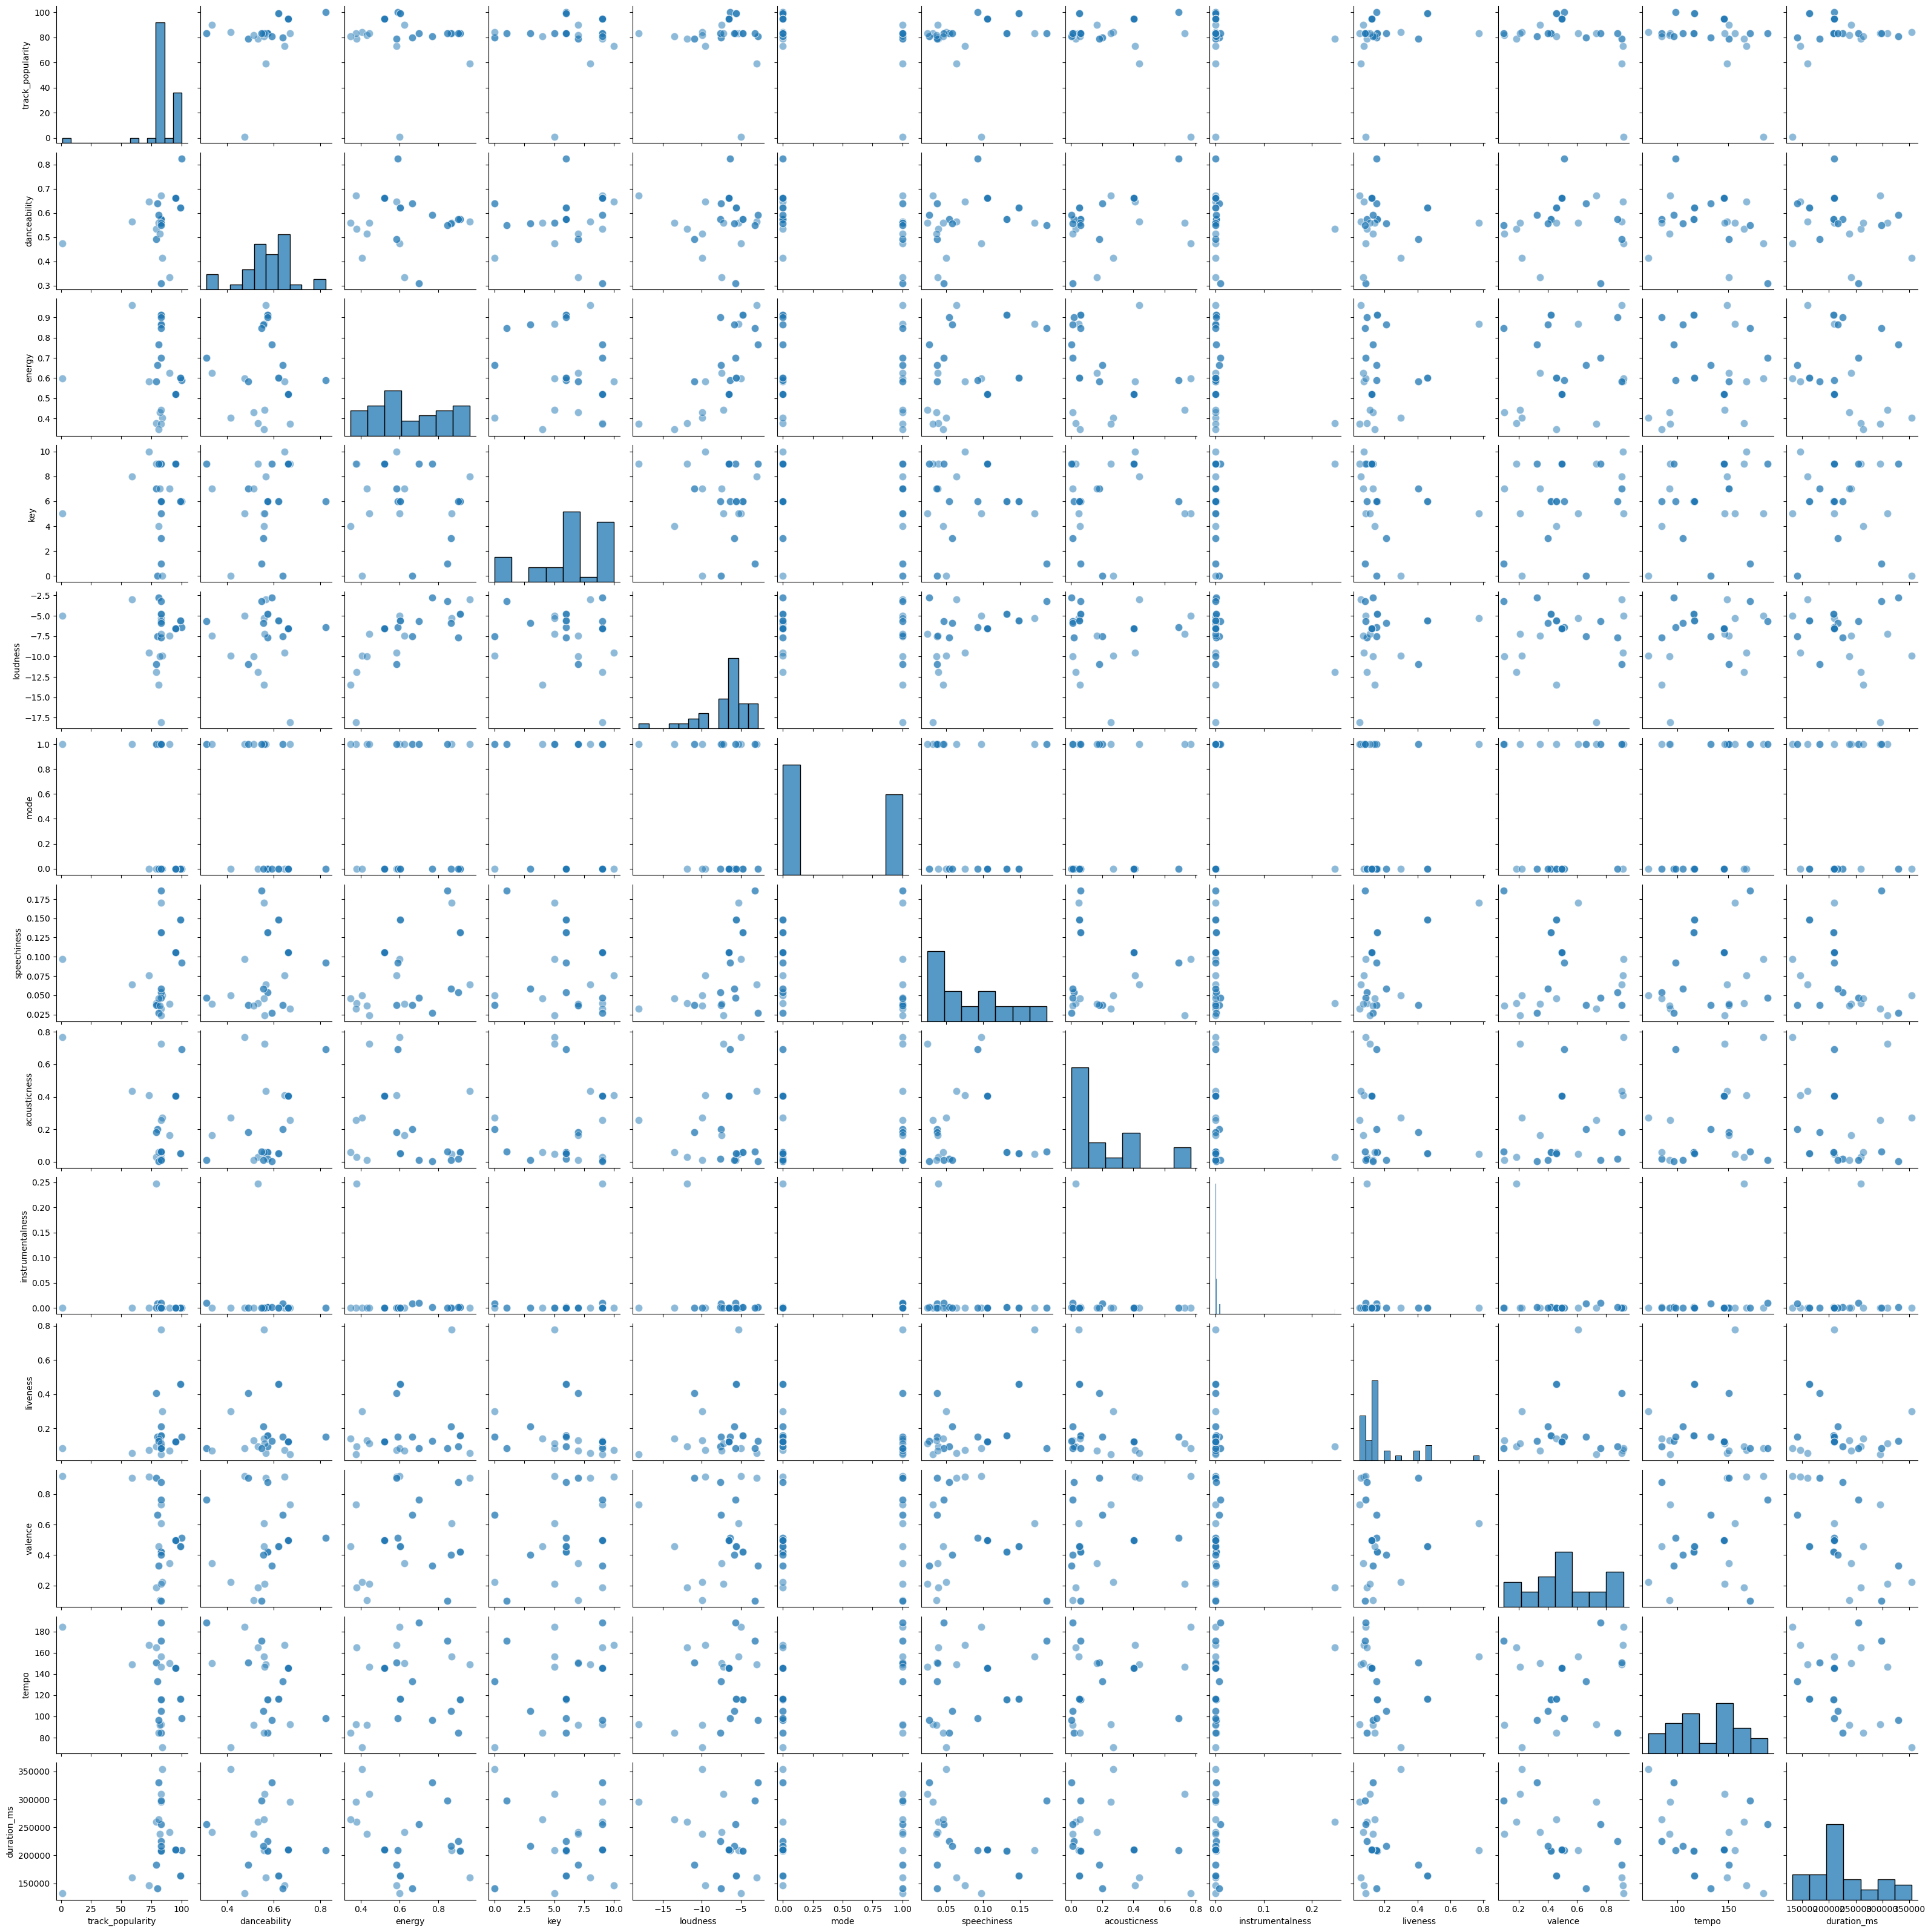

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for the plot
columns_to_plot = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df_top_songs = top_5_songs_per_decade[columns_to_plot]

custom_palette = ["#FF6B6B", "#FFE66D", "#B6E8B7", "#76D7EA", "#C5A1B5"]


# Create a pairplot
sns.pairplot(df_top_songs, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.5, 's':80, "palette": custom_palette})

plt.show()
 

## Regression 

#### This determines how multiple variables together influence song popularity


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting variables for regression
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = df['track_popularity']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False)}")


RMSE: 24.172384031117257


In [13]:
# Extracting coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Displaying coefficients
print(coefficients)


                  Coefficient
danceability         4.923695
energy             -30.608255
key                  0.015615
loudness             1.546975
mode                 0.847601
speechiness         -7.925219
acousticness         3.270816
instrumentalness   -11.762496
liveness            -4.484830
valence              2.526058
tempo                0.021525
duration_ms         -0.000046


In [14]:
# P values
import statsmodels.api as sm

# Selecting variables for regression
X = df[[]]
y = df['track_popularity']
'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
# Adding a constant to the model (statsmodels doesn't add a constant by default)
X = sm.add_constant(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Printing the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                nan
Time:                        15:02:02   Log-Likelihood:            -1.0653e+05
No. Observations:               22979   AIC:                         2.131e+05
Df Residuals:                   22978   BIC:                         2.131e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5504      0.165    258.523      0.0

Note: Each coefficient represents the change in track popularity for a one unit change in the corresponding featurem assuming all other features are held constant:

**Positive Coefficient:** If a feature has a positive coefficient, it means that as the value of that feature increases, the predicted value of track_popularity also increases, all else being equal.

**Negative Coefficient:** Conversely, a negative coefficient indicates that as the value of the feature increases, the predicted value of track_popularity decreases.

**Magnitude of Coefficients:** The larger the absolute value of the coefficient, the more significant the impact of that feature on track_popularity.

**Scale of Features:** Remember that the impact of the coefficients is directly related to the scale of your features. Features with larger numeric ranges might seem to have smaller coefficients.


#### Interpretation

Danceability (Coefficient: 4.9237, P-value: <0.001): Significant. Indicates that an increase in danceability tends to increase track popularity.

Energy (Coefficient: -30.6083, P-value: <0.001): Significant. Suggests that an increase in energy tends to decrease track popularity.

Loudness (Coefficient: 1.5470, P-value: <0.001): Significant. Implies that louder tracks are likely to be more popular.

Mode (Coefficient: 0.8476, P-value: 0.009): Moderately significant. Indicates a slight effect of the mode on track popularity.

Speechiness (Coefficient: -7.9252, P-value: <0.001): Significant. Tracks with more speech (like rap) tend to be less popular.

Acousticness (Coefficient: 3.2708, P-value: <0.001): Significant. More acoustic tracks tend to be more popular.

Instrumentalness (Coefficient: -11.7625, P-value: <0.001): Significant. Tracks with more instrumental content are less likely to be popular.

Liveness (Coefficient: -4.4848, P-value: <0.001): Significant. Live-sounding tracks are less likely to be popular.

Valence (Coefficient: 2.5261, P-value: 0.001): Significant. Tracks with higher valence (happiness) tend to be more popular.

Tempo (Coefficient: 0.0215, P-value: <0.001): Significant. Suggests a very slight increase in popularity with faster tempo.

Duration (Coefficient: -0.000046, P-value: <0.001): Significant. Longer tracks tend to be slightly less popular.

Key (Coefficient: 0.0156, P-value: 0.726): Not significant. The key of the song does not appear to have a significant impact on its popularity.

## Average Popularity by Sub-Genre

Text(0.5, 1.0, 'Average Popularity by Sub-Genre')

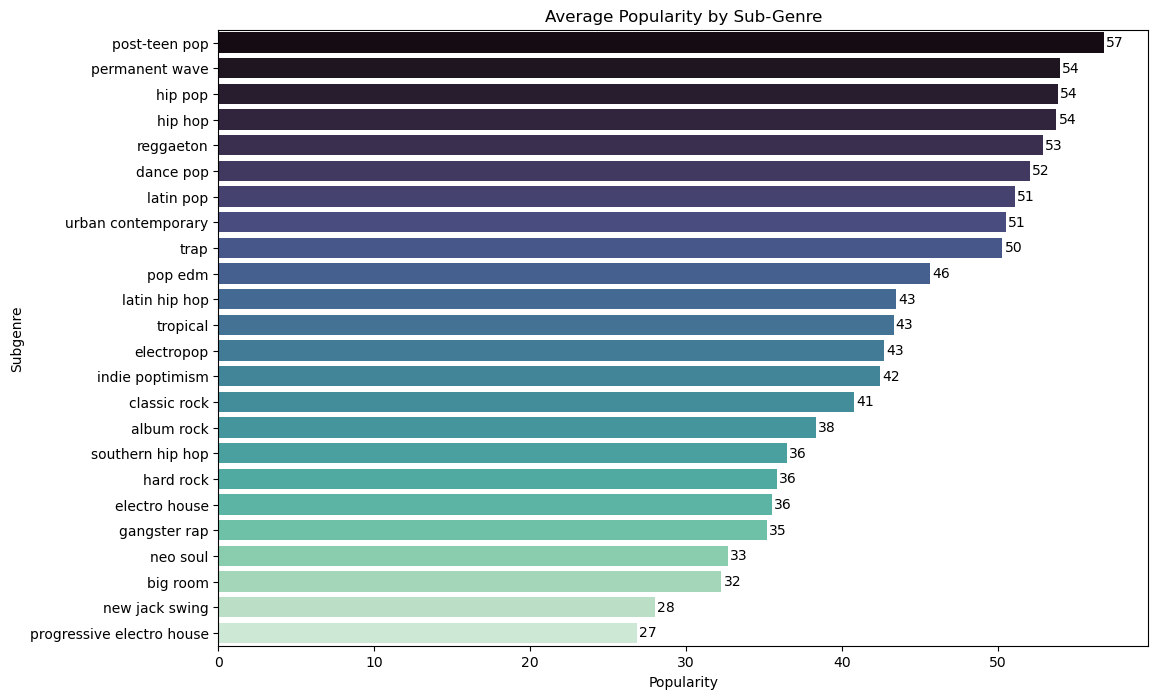

In [15]:
# Calculate average popularity and count for each subgenre
average_popularity = df.groupby('playlist_subgenre')['track_popularity'].mean().reset_index()
count_by_subgenre = df['playlist_subgenre'].value_counts().reset_index()
count_by_subgenre.columns = ['playlist_subgenre', 'count']

# Merge the average popularity with counts
merged_data = pd.merge(average_popularity, count_by_subgenre, on='playlist_subgenre')

# Sorting the data by average popularity
merged_data = merged_data.sort_values('track_popularity', ascending=False)

# Creating a bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='track_popularity', y='playlist_subgenre', data=merged_data, palette='mako')

# Annotate each bar with the count
for p in barplot.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 0.7,    # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2,  # get Y coordinate + half of the bar's height
             '{:1.0f}'.format(width),  # set the count (formatted to remove decimal places)
             ha = 'center',   # horizontal alignment
             va = 'center')   # vertical alignment

plt.xlabel('Popularity')
plt.ylabel('Subgenre')
plt.title("Average Popularity by Sub-Genre")

## Characteristics of Various songs

I am trying this in 2 ways. 1. Splitting low vs high popularity songs and comparing charaxteristics vs correlation

### High VS Low

In [16]:
# Define a threshold for high popularity - this could be a specific value or a percentile
popularity_threshold = df['track_popularity'].quantile(0.75)

# Create two new DataFrames - one for high popularity and one for low
high_popularity_df = df[df['track_popularity'] >= popularity_threshold]
low_popularity_df = df[df['track_popularity'] < popularity_threshold]

In [17]:
# List of characteristics
characteristics = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Calculate the mean values for high and low popularity songs
avg_high_pop = high_popularity_df[characteristics].mean()
avg_low_pop = low_popularity_df[characteristics].mean()

# Create a list of characteristic labels
labels = characteristics



In [18]:
# checking values because the graph was funky, learned duration is skewing it 

print(f"Values for songs with low popularity: {avg_low_pop}")

print(f"Values for songs with high popularity: {avg_high_pop}")

print(f"Number of high popularity songs: {high_popularity_df.shape[0]}")
print(f"Number of low popularity songs: {low_popularity_df.shape[0]}")


Values for songs with low popularity: danceability             0.650104
energy                   0.705583
loudness                -6.867838
mode                     0.560095
speechiness              0.107350
acousticness             0.169994
instrumentalness         0.105504
liveness                 0.193940
valence                  0.503453
tempo                  120.897515
duration_ms         228052.150258
dtype: float64
Values for songs with high popularity: danceability             0.668544
energy                   0.678465
loudness                -6.291661
mode                     0.582012
speechiness              0.106199
acousticness             0.190809
instrumentalness         0.024912
liveness                 0.179313
valence                  0.531048
tempo                  120.843617
duration_ms         219290.296923
dtype: float64
Number of high popularity songs: 8450
Number of low popularity songs: 24378


<IPython.core.display.Javascript object>

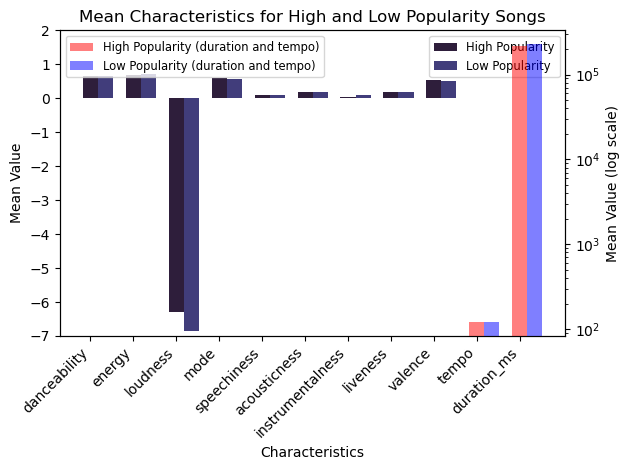

In [19]:
# love when the data is weird so you have to do it manually 



# Set the Seaborn style to use the Mako palette
sns.set_palette("mako")

# Characteristics and their mean values for high and low popularity songs
characteristics = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
avg_high_pop = [0.668544, 0.678465, -6.291661, 0.582012, 0.106199, 0.190809, 0.024912, 0.179313, 0.531048, 120.843617, 219290.296923]
avg_low_pop = [0.650104, 0.705583, -6.867838, 0.560095, 0.107350, 0.169994, 0.105504, 0.193940, 0.503453, 120.897515, 228052.150258]

# Number of characteristics
num_characteristics = len(characteristics)

# Create an array of indices for the characteristics
indices = np.arange(num_characteristics)

# Width of each bar
bar_width = 0.35

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Create bars for high and low popularity means (excluding "tempo" and "duration_ms")
high_pop_bars = ax1.bar(indices[:-2], avg_high_pop[:-2], bar_width, label='High Popularity')
low_pop_bars = ax1.bar(indices[:-2] + bar_width, avg_low_pop[:-2], bar_width, label='Low Popularity')

# Set the primary y-axis range from 2 to -7
ax1.set_ylim(-7, 2)

# Set the y-axis label for the primary y-axis
ax1.set_ylabel('Mean Value')

# Set the plot title
ax1.set_title('Mean Characteristics for High and Low Popularity Songs')

# Create a second y-axis for "tempo" and "duration_ms" on a log scale
ax2 = ax1.twinx()

# Create bars for "tempo" and "duration_ms" on a log scale
high_pop_bars_duration = ax2.bar(indices[-2:], avg_high_pop[-2:], bar_width, label='High Popularity (duration and tempo)', alpha=0.5, color='red')
low_pop_bars_duration = ax2.bar(indices[-2:] + bar_width, avg_low_pop[-2:], bar_width, label='Low Popularity (duration and tempo)', alpha=0.5, color='blue')

# Set the secondary y-axis to be on a log scale for "tempo" and "duration_ms"
ax2.set_yscale('log')

# Set the y-axis label for the secondary y-axis
ax2.set_ylabel('Mean Value (log scale)')

# Move the legends to the right of the graph
ax1.legend(loc='best', fontsize = "small")
ax2.legend(loc='best', fontsize = "small")


# Set the characteristics as x-axis labels
ax1.set_xlabel('Characteristics')
ax1.set_xticks(indices)
ax1.set_xticklabels(characteristics, rotation=45, ha='right')

# Display the combined graph
plt.tight_layout()
plt.show()

In [20]:
# Create a DataFrame
data = {
    'Characteristics': characteristics,
    'Average High Popularity': avg_high_pop,
    'Average Low Popularity': avg_low_pop
}

mean_characteristics = pd.DataFrame(data)

# Display the DataFrame as a table
print(mean_characteristics)

     Characteristics  Average High Popularity  Average Low Popularity
0       danceability                 0.668544                0.650104
1             energy                 0.678465                0.705583
2           loudness                -6.291661               -6.867838
3               mode                 0.582012                0.560095
4        speechiness                 0.106199                0.107350
5       acousticness                 0.190809                0.169994
6   instrumentalness                 0.024912                0.105504
7           liveness                 0.179313                0.193940
8            valence                 0.531048                0.503453
9              tempo               120.843617              120.897515
10       duration_ms            219290.296923           228052.150258


Danceability: High popularity songs have a slightly higher average danceability (0.668544) compared to low popularity songs (0.650104), suggesting that songs with higher danceability tend to be more popular.

Energy: High popularity songs have a slightly lower average energy (0.678465) compared to low popularity songs (0.705583), indicating that energy alone may not be a strong predictor of popularity.

Loudness: High popularity songs have a higher average loudness (-6.291661) compared to low popularity songs (-6.867838). This suggests that louder songs tend to be more popular.

Mode: The mode, which represents modality (major or minor), shows that high popularity songs (0.582012) are more often in major mode compared to low popularity songs (0.560095).

Speechiness: There is a minimal difference in speechiness between high popularity (0.106199) and low popularity (0.107350) songs, implying that speechiness doesn't strongly differentiate the two groups.

Acousticness: High popularity songs have slightly higher average acousticness (0.190809) compared to low popularity songs (0.169994), indicating that more acoustic songs can be found among popular songs.

Instrumentalness: High popularity songs have significantly lower instrumentalness (0.024912) compared to low popularity songs (0.105504), suggesting that popular songs tend to have vocals.

Liveness: There is a minimal difference in liveness between high popularity (0.179313) and low popularity (0.193940) songs, indicating that liveness doesn't strongly differentiate the two groups.

Valence: High popularity songs have a slightly higher average valence (0.531048) compared to low popularity songs (0.503453), suggesting that popular songs may have a more positive mood.

Tempo: The tempo is quite similar between high popularity (120.843617) and low popularity (120.897515) songs, indicating that tempo alone doesn't strongly differentiate the two groups.

Duration: High popularity songs have a shorter average duration (219,290.30 ms) compared to low popularity songs (228,052.15 ms), suggesting that shorter songs may be more popular

### 2. correlation

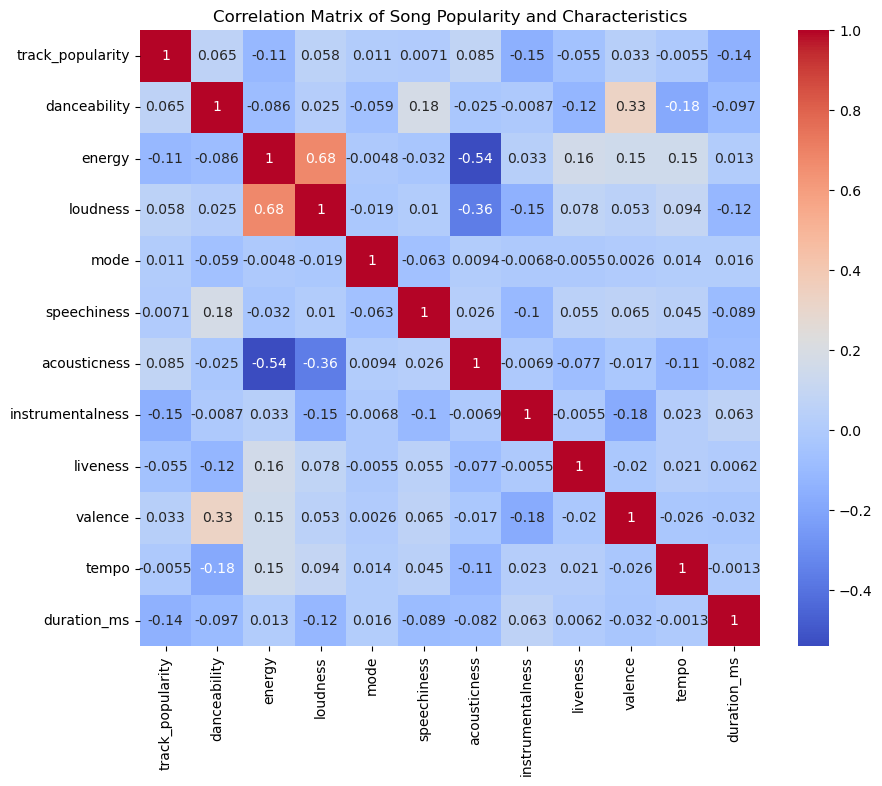

In [21]:
# Selecting relevant columns
columns_for_correlation = ['track_popularity'] + characteristics
correlation_data = df[columns_for_correlation]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Song Popularity and Characteristics')
plt.show()

In [22]:
# Print the correlation matrix as a table
print(correlation_matrix)

                  track_popularity  danceability    energy  loudness  \
track_popularity          1.000000      0.064754 -0.108984  0.057717   
danceability              0.064754      1.000000 -0.086074  0.025351   
energy                   -0.108984     -0.086074  1.000000  0.676662   
loudness                  0.057717      0.025351  0.676662  1.000000   
mode                      0.010553     -0.058711 -0.004778 -0.019242   
speechiness               0.007067      0.181808 -0.032184  0.010313   
acousticness              0.085042     -0.024515 -0.539732 -0.361646   
instrumentalness         -0.150003     -0.008658  0.033282 -0.147823   
liveness                 -0.054593     -0.123899  0.161317  0.077589   
valence                   0.033278      0.330538  0.151050  0.053411   
tempo                    -0.005538     -0.184132  0.150072  0.093761   
duration_ms              -0.143634     -0.096922  0.012560 -0.115039   

                      mode  speechiness  acousticness  instrume

the correlations between these audio characteristics and song popularity are generally weak, indicating that none of these characteristics alone are strong determinants of a song's popularity. Popularity likely depends on a combination of factors

## better model to determine what combo of variables leads to track popularity.

regression models are valuable for understanding individual feature contributions, they might not directly identify the best combination of features. had high errpr 

Mean Squared Error: 573.8863404449644

Root Mean Squared Error: 23.95592495490342

R-squared (R2) Score: 0.065169676325187

####  Regression fail

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define predictor variables (audio characteristics) and the target variable
characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = df[characteristics]
y = df['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')

# Feature Importance Analysis (Random Forest Regressor)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_


<IPython.core.display.Javascript object>

Mean Squared Error: 573.8863404449644
Root Mean Squared Error: 23.95592495490342
R-squared (R2) Score: 0.065169676325187


<IPython.core.display.Javascript object>

In [24]:
print(feature_importances)

[0.08784553 0.09884173 0.04382053 0.10603721 0.00941004 0.09242485
 0.08999259 0.08767863 0.08645039 0.09036984 0.10055594 0.10657274]


### feature selection to get features then lets get model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

# Making duplicate df
data = df

# Define predictor variables (audio characteristics) and the target variable
characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = data[characteristics]
y = data['track_popularity']


# Use SelectKBest with f_regression to select the top features
# You can adjust k to select the desired number of top features
k = 5  # Adjust this value as needed
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = [characteristics[i] for i in selected_indices]

# Sort the selected features by their scores in numerical order
sorted_features = [feature for _, feature in sorted(zip(selector.scores_, selected_features), reverse=True)]
sorted_scores = sorted(selector.scores_, reverse=True)

print("Selected Features (Numerical Order):")
for feature, score in zip(sorted_features, sorted_scores):
    print(f"Feature: {feature}, Score: {score:.2f}")

<IPython.core.display.Javascript object>

Selected Features (Numerical Order):
Feature: duration_ms, Score: 755.62
Feature: instrumentalness, Score: 691.49
Feature: acousticness, Score: 394.58
Feature: danceability, Score: 239.13
Feature: energy, Score: 138.22


## create training and test models

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the features and target variable
X = data[selected_features]
y = data['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict track popularity on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Interpret feature coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
for feature, coef in zip(selected_features, coefficients):
    print(f"{feature}: {coef:.2f}")


<IPython.core.display.Javascript object>

Mean Squared Error (MSE): 582.62
Root Mean Squared Error (RMSE): 24.14
R-squared (R2) Score: 0.05
Intercept: 58.399480310634914
instrumentalness: -15.39
duration_ms: -0.00
energy: -12.06
acousticness: 3.66
danceability: 7.77


the linear regression model does not provide a good fit to the data, as indicated by the low R2 score

### random tree

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data[selected_features]
y = data['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict track popularity on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Interpret feature importances
feature_importances = model.feature_importances_

print("Feature Importances:")
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance:.2f}")



<IPython.core.display.Javascript object>

Mean Squared Error (MSE): 463.05
Root Mean Squared Error (RMSE): 21.52
R-squared (R2) Score: 0.25
Feature Importances:
instrumentalness: 0.15
duration_ms: 0.23
energy: 0.20
acousticness: 0.21
danceability: 0.20


Meanean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted track popularity values. In this case, the MSE of 462.95 indicates that, on average, the predictions are off by approximately 463 popularity units squared.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a more interpretable measure of the error. An RMSE of 21.52 suggests that, on average, the predictions are off by approximately 21.52 popularity units.

R-squared (R2) Score: The R2 score measures the proportion of the variance in the target variable (track popularity) that is explained by the model. An R2 score of 0.25 means that approximately 25% of the variability in track popularity is explained by the features included in the model. While this is an improvement over the linear regression model, there is still room for improvement.

Feature Importances: The feature importances show the relative importance of each selected feature in making predictions. In this case, the top features are:

- duration_ms (23% importance)
- acousticness (21% importance)
- danceability (20% importance)
- energy (20% importance)
- instrumentalness (15% importance)

These percentages indicate how much each feature contributes to the model's predictions. Features with higher importances have a stronger impact on predicting track popularity.


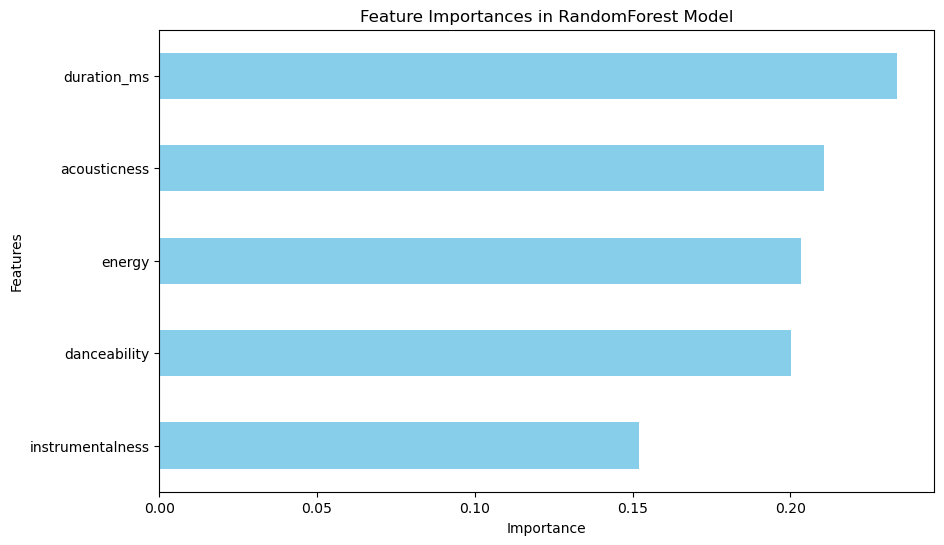

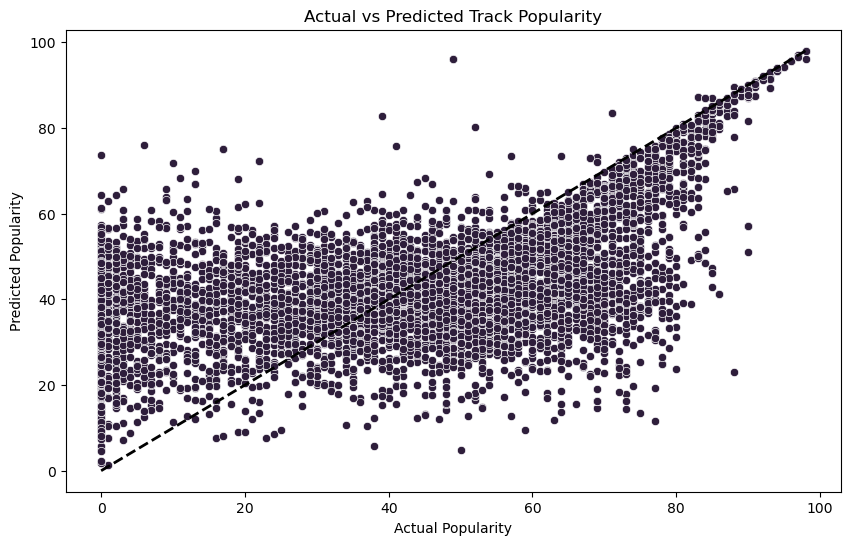

In [28]:
# Visualization of Feature Importances
feature_importances = model.feature_importances_
features = selected_features
importances = pd.Series(feature_importances, index=features)

plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualization of Actual vs Predicted Values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Track Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Positive Relationship: There's a clear positive correlation between the actual and predicted values, meaning that as the actual popularity increases, the predicted popularity also tends to increase. This is a good sign and indicates that the model has learned the trend in the data.

Concentration of Points: Most of the data points seem to be concentrated along the line (the dashed line that represents perfect predictions), especially where the actual popularity is below 60. This suggests that the model is relatively accurate within this range.

Spread of Points: As the popularity increases, the spread of predictions becomes wider, particularly for tracks with higher popularity scores (above 60). This might indicate that the model is less precise for tracks with very high popularity.

Outliers: There are some points that are far from the line, which could be considered outliers. For example, there are tracks with low actual popularity that the model predicted to have higher popularity, and vice versa.

Perfect Prediction Line: The dashed line represents the line of perfect prediction. If every prediction was correct, all points would lie on this line. While many predictions are close to this line, none are consistently on it, which is to be expected in real-world data.

Overall, the model seems to have predictive power, as indicated by the clustering of points along the line of perfect prediction, but it also has room for improvement, especially in the higher range of track popularity. 